<a href="https://colab.research.google.com/github/johnny080524/Assigement/blob/master/Machine_Learning_Spring_32513_A2_ShenChuan_Lin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Spring 32513

13432772

SHEN-CHUAN LIN

Link:https://github.com/johnny080524/Assigement/blob/master/Machine_Learning_Spring_32513_A2_13432772_ShenChuan_Lin.ipynb

# Introduction
The report uses the dataset which is crime incident reports are provided by the Boston Police Department. The data is collected by the crime incident report system which recorded the type of incident and where and when did incidents happen. The problems the article wants to analyze shows below:
1.	What kinds of crimes are most common?
2.	Where did the crime happen?
3.	When did the crime occur?
4.	After finding out the frequency of the crime, and does its frequency changed over a day, week, or month?

The first question defines the majority type of crimes, which can figure out the reason for the crime. The second question, the location detail helps police to predict the next crimes might happen in the place that has been secured to prevent the crime. The third question, the time data illustrates that the maximum probability in the specific time range the crime might happen. The accurate time increases the probability of prediction that raises the efficiency of crime prevention. The result from the question above demonstrates what, where, and when the crime occurred that the accurate estimation of the location might have the highest chance for the crime happened. However, the crime rate could change by the time, which has a high peak and a low peak in a year. The last question aims to analyze the peak of the crime to enhance the efficiency of crime prevention for the Boston Police Department.





# Exploration
At the beginning of the data exploration, there are over 50 types of crimes have recorded in the document, which makes estimation difficultly. Thus, the report will not analyze those small amounts of data and focus on major crimes. Using the filter to select crimes that meet our requirement. The data plan and data model are listed below.

•	Checking missing values
This step is checking the missing value in each column delete the value to minimize the effect from noise data. The missing value has marked as a nan that improves errors and accuracy.

•	Checking anomalies
Anomalies have occurred in columns that drop the quality of data. It has removed from the data to improve quality.

•	Remove duplicates
Duplicates have found out in INCIDENT_NUMBER column that one number has multiple records. Applying the column that associates with other data might decrease accuracy. The report drops INCIDIENT_NUMBER and OFFENSE_CODE because these two columns can replace by OFFENSE_CODE_GROUP. 

•	Data preparation
The step is going to turn the character into numerical values. DATE_OF_WEEK and UCR_PART are turned in to numerical values. Each row would have only one true value in columns. If the data point is a Monday in DATE_OF_WEEK and other data point is a part one in UCR_PART, then there will have a 1 in the Monday and part one columns and a 0 in all other columns.

•	Training and Testing set
It is a final step of data preparation. The dataset is split into training and test data. The data will randomly split into those datasets above to get a representation of all data points.

•	Train Model
The model the report chose to create and train is the random forest model. The process of the step can be provided from Scikit-learn.

•	Determine the performance metric
Calculating the accuracy from the result of random forest makes sure the quality of data that has prepared is in good condition.



# Methodology


# 1.   Import dataset from google drive - Crime in Boston




In [506]:
!pip install pydrive

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import xarray as xr  

COLAB = True


In [0]:
try:
    import netCDF4
except:
    !pip install netcdf4
import xarray as xr    

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [510]:
link = 'https://drive.google.com/open?id=1HRH-z_4LysGI85MuCIGQySOtChx2_VuS' 
# The shareable link
fluff, id = link.split('=')
print (id) 
# Verify that you have everything after '='

1HRH-z_4LysGI85MuCIGQySOtChx2_VuS


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('crime1.csv')  
df3 = pd.read_csv('crime1.csv')
# Dataset is now stored in a Pandas Dataframe

# 2.   Data cleaning
2.1 The table showing below is the top 5 rows of all columns from the dataset. Next is checking all type of values and all entries.

In [512]:
df3.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018/9/2 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018/8/21 00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018/9/3 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018/9/3 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018/9/3 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [513]:
len(df3)

319073

In [514]:
print(f'The dataset contains %s rows and %s columns' % (df3.shape[0],df3.shape[1]), '\n')
print('The columns and the its values types:\n')
df3.info()

The dataset contains 319073 rows and 17 columns 

The columns and the its values types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), in

2.2	The description of some columns is not useful features in data analysis. Thus, two columns are deleted in the report, which is INCIDENT_NUMBER and OFFENSE_CODE. Using OFFENSE_CODE_GROUP is clearly to represent major crime with details. The crime focuses on the most common crimes.

In [0]:
to_drop = ['INCIDENT_NUMBER','OFFENSE_CODE']
            
df3.drop(to_drop, inplace=True, axis=1)

In [516]:
df3.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018/9/2 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,Vandalism,VANDALISM,C11,347,NaN,2018/8/21 00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018/9/3 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018/9/3 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018/9/3 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [517]:
df3['UCR_PART'].value_counts()

Part Three    158553
Part Two       97569
Part One       61629
Other           1232
Name: UCR_PART, dtype: int64

In [518]:
df3['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
Drug Violation                               16548
Simple Assault                               15826
Vandalism                                    15415
Verbal Disputes                              13099
Towed                                        11287
Investigate Property                         11124
Larceny From Motor Vehicle                   10847
Property Lost                                 9751
Warrant Arrests                               8407
Aggravated Assault                            7807
Violations                                    6095
Fraud                                         5829
Residential Burglary                          5606
Missing Person Located                        4958
Auto Theft                     

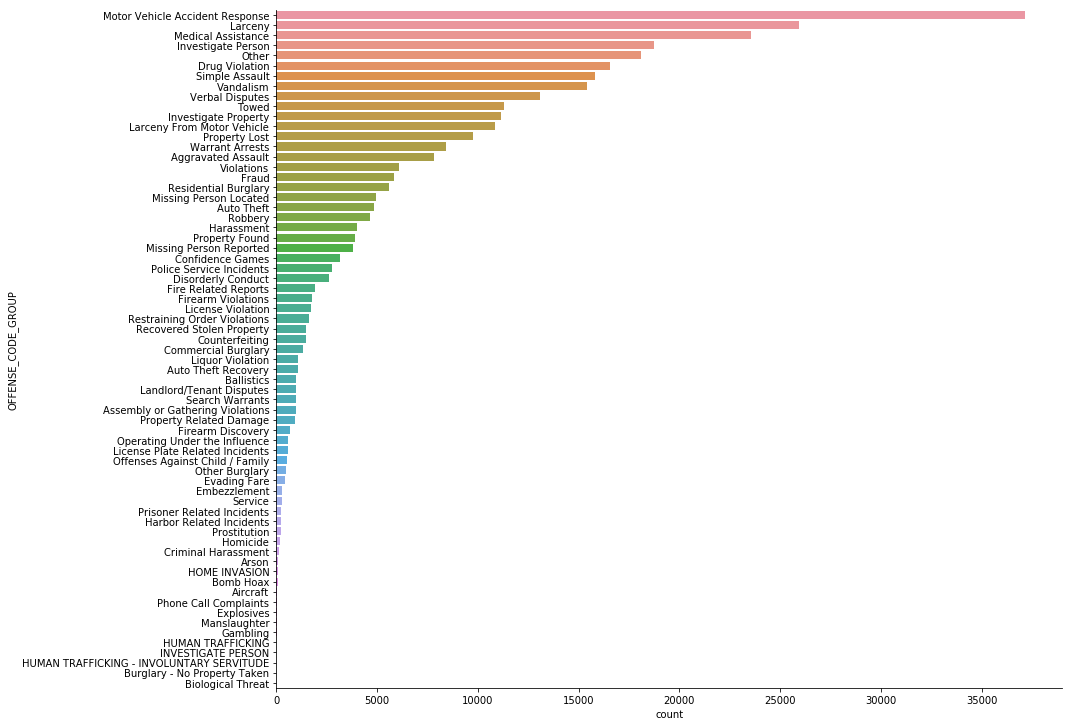

In [519]:
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=10, 
            aspect=1.5,
            order=df3.OFFENSE_CODE_GROUP.value_counts().index,
           data=df3)

2.3	Checking missing values and anomalies in this step finds that the missing values occur in DISTRICT, UCR_PART, Street, Latitude and Longitude, and the SHOOTING column almost contains no values inside. SHOOTING column is not a point in this study, then in this step that decides to fill nan into the column.

In [520]:
print(df3.isnull().sum())

OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64


In [0]:
df3.SHOOTING.fillna('N', inplace=True)

In [522]:
df3.isnull().sum().sort_values(ascending=False)

Long                   19999
Lat                    19999
STREET                 10871
DISTRICT                1765
UCR_PART                  90
Location                   0
HOUR                       0
DAY_OF_WEEK                0
MONTH                      0
YEAR                       0
OCCURRED_ON_DATE           0
SHOOTING                   0
REPORTING_AREA             0
OFFENSE_DESCRIPTION        0
OFFENSE_CODE_GROUP         0
dtype: int64

2.4	The describe table shows that the anomalies happened in Lat and Long columns that contain -1 value. It is a outliner to drop the accuracy from the column. The -1 value is replaced by none.

In [0]:
# Replace -1 values in Lat/Long with Nan
df3.Lat.replace(-1, None, inplace=True)
df3.Long.replace(-1, None, inplace=True)

In [524]:
df3.describe()

,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,299029.000000,299029.000000
mean,2016.560586,6.609719,13.118205,42.322300,-71.082851
std,0.996344,3.273691,6.294205,0.031883,0.029775
min,2015.000000,1.000000,0.000000,42.232413,-71.178674
25%,2016.000000,4.000000,9.000000,42.297555,-71.097193
50%,2017.000000,7.000000,14.000000,42.325610,-71.077562
75%,2017.000000,9.000000,18.000000,42.348624,-71.062563
max,2018.000000,12.000000,23.000000,42.395042,-70.963676


2.5	OCCURRED_ON_DATE is string in the data, then it is replaced by datetime. WEEK_OF_DAY is coverted to an ordered category.

In [0]:
df3['OCCURRED_ON_DATE'] = pd.to_datetime(df3['OCCURRED_ON_DATE'])
df3.DAY_OF_WEEK = pd.Categorical(df3.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

In [526]:
df3.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


# 3. Training and Testing set
1.	The major crimes have showed above.
2.	When is crime usually happen? 
Using time units from data are hours, days, and months. After the result has shown that combine all results can get the data to predict when would the common crime happens in the future.


Text(-8.950000000000003, 0.5, 'Count')

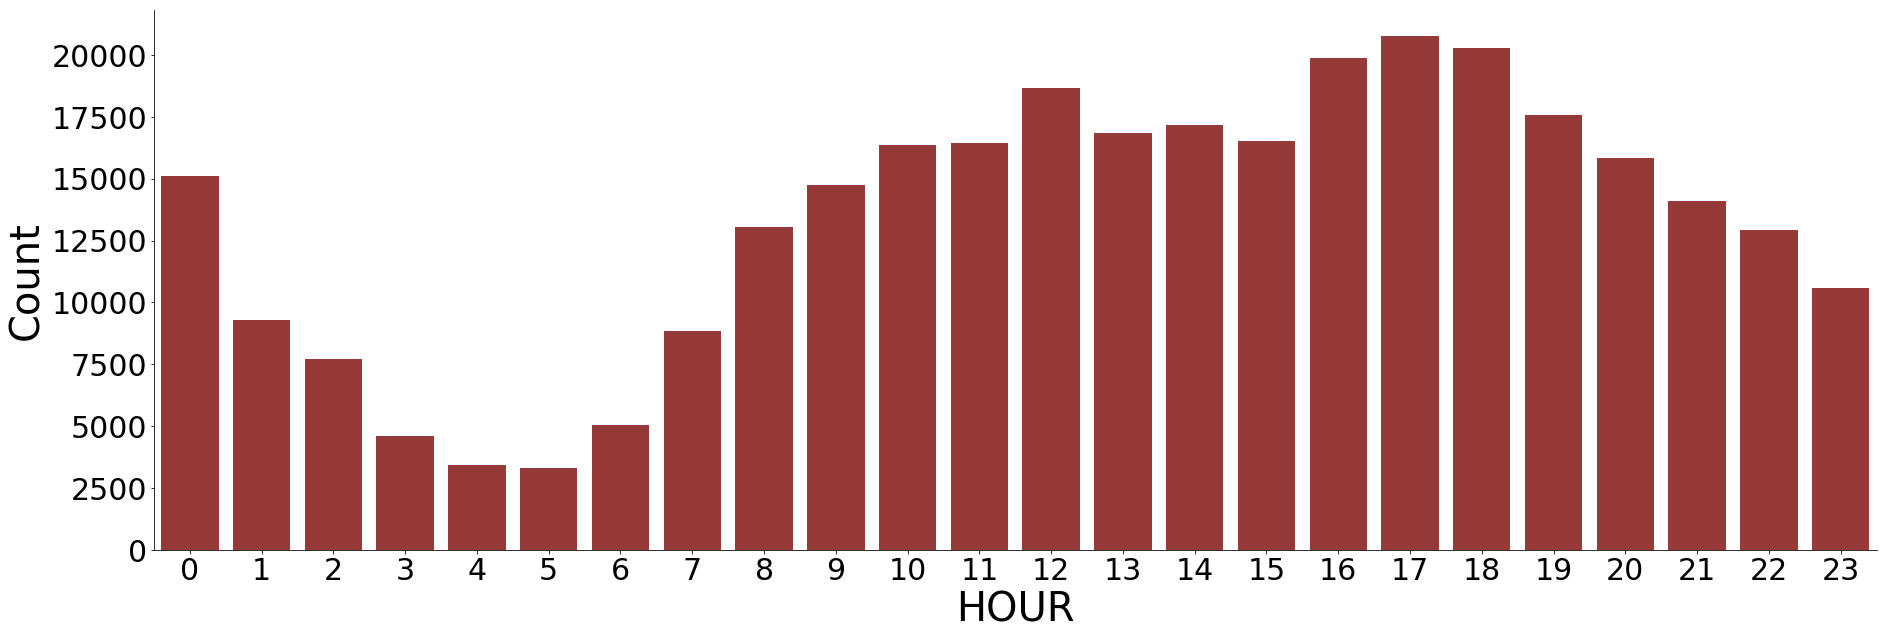

In [527]:
sns.catplot(x='HOUR',
           kind='count',
            height=8.27, 
            aspect=3,
            color='brown',
           data=df3)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('HOUR', fontsize=40)
plt.ylabel('Count', fontsize=40)

Text(-8.700000000000003, 0.5, 'Count')

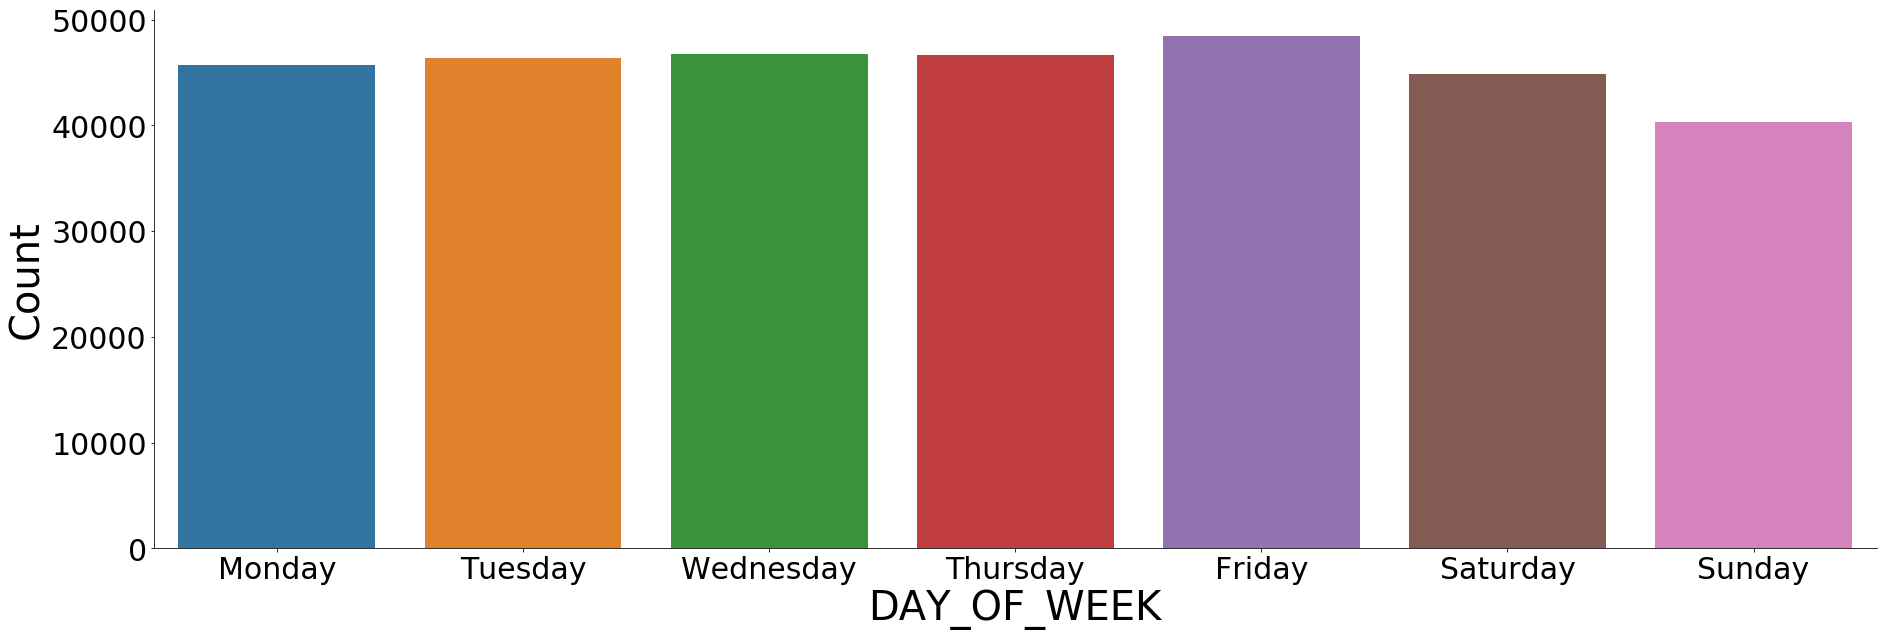

In [528]:
sns.catplot(x='DAY_OF_WEEK',
           kind='count',
            height=8.27, 
            aspect=3,
            data=df3)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('DAY_OF_WEEK', fontsize=40)
plt.ylabel('Count', fontsize=40)

Text(-8.824999999999996, 0.5, 'Count')

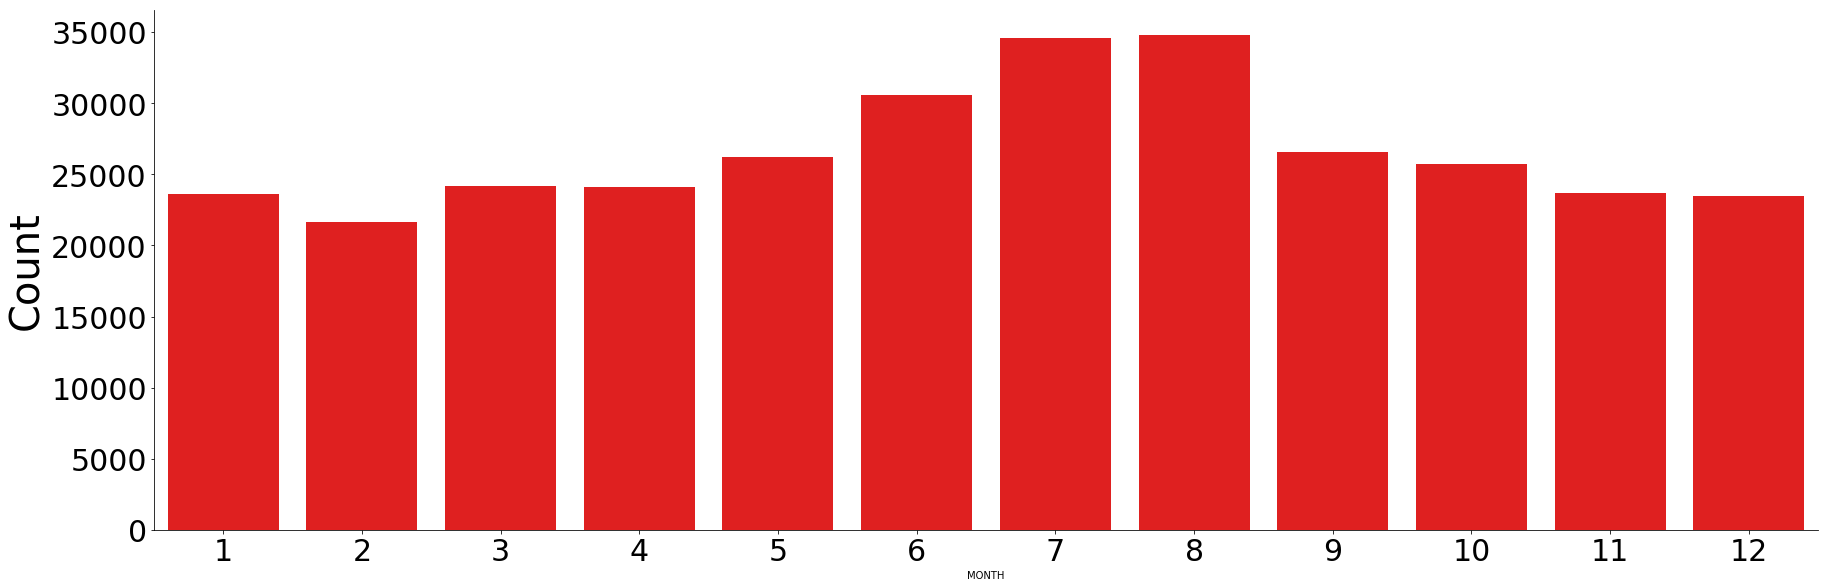

In [529]:
sns.catplot(x='MONTH',
           kind='count',
            height=8, 
            aspect=3,
            color='red',
           data=df3)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('MONTH')
plt.ylabel('Count', fontsize=40)

3.	Where is crime usually occur? 
Using a simple scatter plot shows the cluster that performs like a rough map on the graph. One is the data of crime draws the map. Other one is the data of district shows the different number of crimes occur in different places.


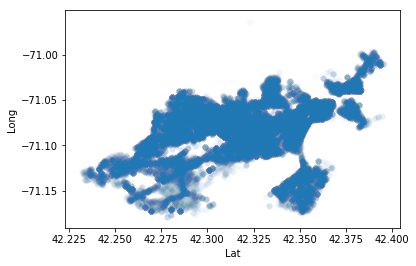

In [530]:
# Simple scatterplot
sns.scatterplot(x='Lat',
               y='Long',
                alpha=0.01,
               data=df3)

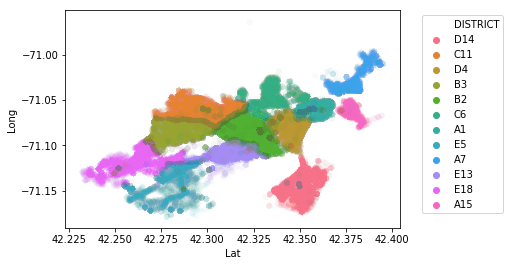

In [531]:
# Plot districts
sns.scatterplot(x='Lat',
               y='Long',
                hue='DISTRICT',
                alpha=0.01,
               data=df3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

4.	Final problem focuses on the prediction of the major crime that happens in  a district. The prediction could help the police station in each district to prevent the major crime.

In [532]:
df3['OFFENSE_CODE_GROUP']

0                                  Larceny
1                                Vandalism
2                                    Towed
3                     Investigate Property
4                     Investigate Property
5          Motor Vehicle Accident Response
6                               Auto Theft
7                          Verbal Disputes
8                                  Robbery
9                          Verbal Disputes
10                         Verbal Disputes
11                    Investigate Property
12                    Fire Related Reports
13                                   Other
14                           Property Lost
15                      Medical Assistance
16                         Verbal Disputes
17        Assembly or Gathering Violations
18                                   Other
19              Larceny From Motor Vehicle
20                      Medical Assistance
21         Motor Vehicle Accident Response
22                      Medical Assistance
23         

In [533]:
df3['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Medical Assistance', 'Assembly or Gathering Violations',
       'Larceny From Motor Vehicle', 'Residential Burglary',
       'Simple Assault', 'Restraining Order Violations', 'Violations',
       'Harassment', 'Ballistics', 'Property Found',
       'Police Service Incidents', 'Drug Violation', 'Warrant Arrests',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Aggravated Assault', 'License Plate Related Incidents',
       'Firearm Violations', 'Other Burglary', 'Arson', 'Bomb Hoax',
       'Harbor Related Incidents', 'Counterfeiting', 'Liquor Violation',
       'Firearm Discovery', 'Landlord/Tenant Disputes',
       'Missing Person Located', 'Auto Theft Recovery', 'Service',
       'Operating Und

In [0]:
MotorVehicleAccidentResponse_data = df3.loc[df3['OFFENSE_CODE_GROUP'] == "Motor Vehicle Accident Response"]

In [535]:
MotorVehicleAccidentResponse_data.head(5)

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,N,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
21,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,A1,69,N,2018-09-03 18:30:00,2018,9,Monday,18,Part Three,BEACON ST,42.355644,-71.071681,"(42.35564426, -71.07168077)"
23,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,E5,550,N,2018-09-03 18:33:00,2018,9,Monday,18,Part Three,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)"
25,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,N,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
44,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY AMAGE,C11,402,N,2018-09-03 15:34:00,2018,9,Monday,15,Part Three,WASHINGTON ST,42.284926,-71.071353,"(42.28492596, -71.07135254)"


In [536]:
MotorVehicleAccidentResponse_data['DISTRICT'].value_counts()

B2     6407
C11    5305
D4     3882
B3     3836
D14    2857
A1     2847
C6     2699
E18    2366
E13    2166
E5     1813
A7     1516
A15     960
Name: DISTRICT, dtype: int64

In [0]:
MotorVehicleAccidentResponse_B2 = MotorVehicleAccidentResponse_data.loc[MotorVehicleAccidentResponse_data['DISTRICT'] == 'B2']

In [538]:
MotorVehicleAccidentResponse_B2.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
46,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,B2,901,N,2018-09-03 15:00:00,2018,9,Monday,15,Part Three,WARD ST,42.335111,-71.095922,"(42.33511145, -71.09592156)"
64,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,B2,603,N,2018-09-03 15:29:00,2018,9,Monday,15,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
115,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,605,N,2018-09-03 12:37:00,2018,9,Monday,12,Part Three,FISHER AVE,42.330610,-71.108536,"(42.33061023, -71.10853621)"
124,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,326,N,2018-09-02 19:30:00,2018,9,Sunday,19,Part Three,LAWRENCE AVE,42.311611,-71.076256,"(42.31161123, -71.07625600)"
244,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,B2,311,N,2018-09-02 20:32:00,2018,9,Sunday,20,Part Three,MARTIN LUTHER KING JR BLV,42.317916,-71.082156,"(42.31791574, -71.08215630)"


In [539]:
 MotorVehicleAccidentResponse_B2["REPORTING_AREA"].unique()

array(['901', '603', '605', '326', '311', '266', '297', '318', '276',
       '263', '288', '317', '180', '614', '313', '587', ' ', '329', '319',
       '328', '304', '291', '600', '178', '280', '300', '315', '327',
       '261', '181', '282', '268', '182', '316', '588', '267', '289',
       '269', '314', '320', '259', '184', '566', '257', '330', '586',
       '321', '292', '584', '237', '331', '258', '296', '287', '904',
       '265', '262', '606', '323', '593', '238', '585', '309', '264',
       '294', '601', '281', '324', '279', '305', '613', '295', '239',
       '458', '293', '325', '611', '604', '298', '183', '567', '306',
       '290', '302', '299', '278', '286', '308', '310', '602', '589',
       '332', '911', '909', '333', '615', '260', '322', '307', '185',
       '179', '301', '616', '592', '455', '920', '241', '124', '572',
       '312', '612', '191', '240', '571', '424', '285', '527', '175',
       '459', '26', '284', '568', '337', '29', '165', '465', '581', '582'],
      dty

In [540]:
px.scatter(MotorVehicleAccidentResponse_B2.query('REPORTING_AREA == ["901"]'), 
           x="DAY_OF_WEEK", y="HOUR", color="DISTRICT", trendline="ols")

ValueError: ignored

# Evaluation
1.	Cleaning data is important for data analytics, and it includes lots of work to minimize the noise from unstructured data. First, some useless columns like OFFENSE_CODE and INCIDENT_NUMBER are the same as OFFENSE_CODE_GROUP. These columns is deleted in this step. 
Second, the report eliminates the missing values in SHOOTING column, but it does not delete or gives any values for missing values in other columns. The given value for missing values is not friendly to raise the quality of results from DISTRICT, STREET, Lat, Long and UCR_PART columns. Each row contains much information with less numeric, so the report does not give any values or delete missing values or delete rows.
Final, anomalies occur in Lat and Long column brings extreme value to decrease the quality of data. It has deleted for quality maintenance.

2.	What kinds of crimes are most common?
The major crime is easy to define from the data of OFFENSE_CODE_GROUP. It has no issue here. Using the simple bar chart shows that motor vehicle accident response is a common crime in Boston.

3.	When is the crime usually happen?
First, using the histogram with the condition of HOUR from crime data shows two groups that the low and high peaks are from 3 to 5 and 16 -18, respectively. In the first group has a low number of crimes, which might present most people sleep at the time. Another group presents the night time, and most people are activity, which has a high activity of crimes. 
Second, after the result of HOUR the study checks the DAY which has a significant number of crimes. The answer is Friday, which could present high activity and high risk to induce the crime.
Third, the study goes further to the MONTH. The result indicates that the crime happens in the summer vacation from July to August, which means the point is similar to the result above.
In sum, the combination of results above shows that serious crime happens at a specific time in Bonton approximately.

4.	Where did the crime occur?
The data barely shows the area that the crime occurred. The problem here is using DISTRICT performs each total crime in each area, but it still can point out a specific crime in a specific area. Also, the study tries to combine the result to the real map; somehow, the code implemented correctly without showing the combined map.

5.	After finding out the frequency of the crime, and does its frequency changed over a day, week, or month in a specific district?
First, the step identifies all unique values in each row. According to the data shown above, Motor vehicle accident response is a major crime in Boston. The number of crimes in the B2 district is more significant than in other districts. Second, the B2 district combines time and day to check the trend in different period. Final, the problem occurred about the trend graph can not run correctly.


# Conclusion
According to the results and problems above, there are few ways to improve the resulting quality and correcting coding in further study in ML in Python.
First, the code of the algorithm is serious problem for a beginner in this study. The principle and basic operation are not understood well, which occur the wrong process in the algorithm.
Second, even though the time, day, month and location of total crime can define in the study, the sign of a specific crime with conditions above can not be done in the paper.
Third, the paper turns the DAY_OF_WEEK to binary data, but the difficult part is the setting training data and data model. Different characters need to turn to the right character, then the process of random forest model can access to the result.
Final, there are several ways to improve the operation. One is choosing iris data that can practice on data models like random forest easily. The second one is acquiring the knowledge of turning the character between different characters. The last one is practicing useful algorithms for any problems in data mining.


# Ethical
Base on the duty-based ethics tells that do the right thing even it produces more harm than doing wrong thing. In the criminal record system, it produces the result of crime with the time and the location that can help the police to arrest the criminal. The ethical problem is going to discuss if the data direct to the wrong person. When analysts clean the maximum of noise in the data, which analyzes the crime usually happens in a specific location at a specific time. The result combines the target group of people who often appear in the area and at the time. The crime happens, and police arrest a suspect according to the prediction. However, the suspect does not offend with no evidence to prove himself, and he is still prosecuted by the crime. The tricky thing is that the analyst does the right thing to prevent the rate of crime in the city, and somehow, it may occur the wrong thing in Individuals. Will people think about the total crime reduce by the prediction or the wrong denunciation on the wrong person? Following the rules of the duty-based ethics about do the right thing is the right way, and analysts keep on the prediction of the crime.


# Problems

In [0]:
# Create basic Folium crime map
crime_heatmap = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "OpenStreetMap",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = df3[df3.YEAR == 2017]
data_heatmap = df3[['Lat','Long']]
data_heatmap = df3.dropna(axis=0, subset=['Lat','Long'])
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_heatmap)

# Plot
crime_heatmap

In [0]:
# Create basic Folium crime map
crime_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = df3[df3.YEAR == 2016]
data_heatmap = df3[['Lat','Long']]
data_heatmap = df3.dropna(axis=0, subset=['Lat','Long'])
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot!
crime_map

In [0]:
DAY_OF_WEEK = pd.get_dummies(df3['DAY_OF_WEEK'])
print(DAY_OF_WEEK)

In [0]:
#Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(df3['Lat'])

# Remove the labels from the features
# axis 1 refers to the columns
features= df3.drop('Lat', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [0]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);